In [1]:
import pandas as pd
import seaborn as sns

In [32]:
print(pd.__version__)
print(sns.__version__)

1.3.4
0.11.2


In [2]:
accident2019 = pd.read_csv("Data/honhyo_2019.csv", encoding="Shift-JIS")
accident_supplement_2019 = pd.read_csv("Data/hojuhyo_2019.csv", encoding="Shift-JIS")
accident_motorway_2019 = pd.read_csv("Data/kosokuhyo_2019.csv", encoding="Shift-JIS")

In [3]:
accident2019.columns

Index(['資料区分', '都道府県コード', '警察署等コード', '本票番号', '事故内容', '死者数', '負傷者数', '路線コード',
       '上下線', '地点コード', '市区町村コード', '発生日時　　年', '発生日時　　月', '発生日時　　日', '発生日時　　時',
       '発生日時　　分', '昼夜', '天候', '地形', '路面状態', '道路形状', '環状交差点の直径', '信号機',
       '一時停止規制　標識（当事者A）', '一時停止規制　表示（当事者A）', '一時停止規制　標識（当事者B）',
       '一時停止規制　表示（当事者B）', '車道幅員', '道路線形', '衝突地点', 'ゾーン規制', '中央分離帯施設等', '歩車道区分',
       '事故類型', '年齢（当事者A）', '年齢（当事者B）', '当事者種別（当事者A）', '当事者種別（当事者B）',
       '用途別（当事者A）', '用途別（当事者B）', '車両形状（当事者A）', '車両形状（当事者B）',
       '速度規制（指定のみ）（当事者A）', '速度規制（指定のみ）（当事者B）', '車両の衝突部位（当事者A）',
       '車両の衝突部位（当事者B）', '車両の損壊程度（当事者A）', '車両の損壊程度（当事者B）', 'エアバッグの装備（当事者A）',
       'エアバッグの装備（当事者B）', 'サイドエアバッグの装備（当事者A）', 'サイドエアバッグの装備（当事者B）',
       '人身損傷程度（当事者A）', '人身損傷程度（当事者B）', '地点　緯度（北緯）', '地点　経度（東経）', '曜日(発生年月日)',
       '祝日(発生年月日)'],
      dtype='object')

In [4]:
accident_supplement_2019.columns

Index(['資料区分', '都道府県コード', '警察署等コード', '本票番号', '補充票番号', '当事者種別', '乗車別', '乗車等の区分',
       'エアバッグの装備', 'サイドエアバッグの装備', '人身損傷程度', '用途別', '車両形状', '車両の衝突部位',
       '車両の損壊程度'],
      dtype='object')

In [5]:
accident_motorway_2019.columns

Index(['資料区分', '都道府県コード', '警察署等コード', '本票番号', '発生地点', '道路管理者区分', '道路区分', '道路構造',
       '曲線半径', '縦断勾配', 'トンネル番号', '当事者車両台数', '事故類型', '車両単独事故の対象物', '臨時速度規制の有無',
       '速度規制（臨時のみ）', 'トンネル延長距離'],
      dtype='object')

In [6]:
accident2019.shape

(381237, 58)

In [7]:
accident_motorway_2019.shape

(7094, 17)

In [8]:
result = pd.merge(accident2019, accident_motorway_2019, how = "inner", on = ['都道府県コード', '警察署等コード', '本票番号'])

In [9]:
result.shape

(7094, 72)

In [10]:
accident2020 = pd.read_csv("Data/honhyo_2020.csv", encoding="Shift-JIS")
accident_supplement_2020 = pd.read_csv("Data/hojuhyo_2020.csv", encoding="Shift-JIS")
accident_motorway_2020 = pd.read_csv("Data/kosokuhyo_2020.csv", encoding="Shift-JIS")

In [11]:
accident2021 = pd.read_csv("Data/honhyo_2021.csv", encoding="Shift-JIS")
accident_supplement_2021 = pd.read_csv("Data/hojuhyo_2021.csv", encoding="Shift-JIS")
accident_motorway_2021 = pd.read_csv("Data/kosokuhyo_2021.csv", encoding="Shift-JIS")

In [12]:
accident_all = pd.concat([accident2019,accident2020,accident2021])
accident_all.shape

(995611, 58)

In [13]:
accident2019["date"] = pd.to_datetime({"year":accident2019["発生日時　　年"],"month":accident2019["発生日時　　月"],"day":accident2019["発生日時　　日"]})
accident_all["date"] = pd.to_datetime({"year":accident_all["発生日時　　年"],"month":accident_all["発生日時　　月"],"day":accident_all["発生日時　　日"]})

In [14]:
accident_all.head()

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),date
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,431412959,1414947029,6,3,2018-12-28
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,425706029,1413039991,1,3,2019-01-06
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,424115557,1414158530,3,3,2018-12-18
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,425647051,1413100440,7,3,2019-01-05
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,425606992,1420518034,2,2,2018-12-31


In [15]:
fileType = pd.read_csv("Data/master/1_koudohyou_siryoukubun.csv", skiprows=4, usecols = range(0,2))

In [16]:
fileType

,コード,区分
0,1,本票
1,2,補充票
2,3,高速票


In [17]:
age = pd.read_csv("Data/master/30_koudohyou_nenrei.csv", skiprows=4, usecols = range(0,2))
age

,コード,区分
0,1,0～24歳
1,25,25～34歳
2,35,35～44歳
3,45,45～54歳
4,55,55～64歳
5,65,65～74歳
6,75,75歳以上
7,0,不明


In [18]:
accident_all["年齢（当事者A）"] = accident_all["年齢（当事者A）"] .map(age.set_index('コード').区分)
accident_all["年齢（当事者B）"] = accident_all["年齢（当事者B）"] .map(age.set_index('コード').区分)

In [20]:
age_crosstab = pd.crosstab(accident_all["年齢（当事者A）"],accident_all["年齢（当事者B）"])

In [21]:
age_crosstab

年齢（当事者B）,0～24歳,25～34歳,35～44歳,45～54歳,55～64歳,65～74歳,75歳以上,不明
年齢（当事者A）,,,,,,,,
0～24歳,18504,18523,19274,19914,12961,10117,6375,11180
25～34歳,27109,24855,25747,26783,17755,14889,10011,6034
35～44歳,32068,26802,27773,29369,19698,17142,12588,5869
45～54歳,36647,30256,31158,34601,22805,19490,15073,7215
55～64歳,26622,21559,22902,24504,17187,15053,11707,6124
65～74歳,23678,19300,20882,22410,15492,15486,13003,6558
75歳以上,11417,9635,10403,11354,8319,8887,8160,6325
不明,0,0,0,0,0,0,0,59


In [22]:
#pip install japanize-matplotlib

In [23]:
import japanize_matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='年齢（当事者B）', ylabel='年齢（当事者A）'>

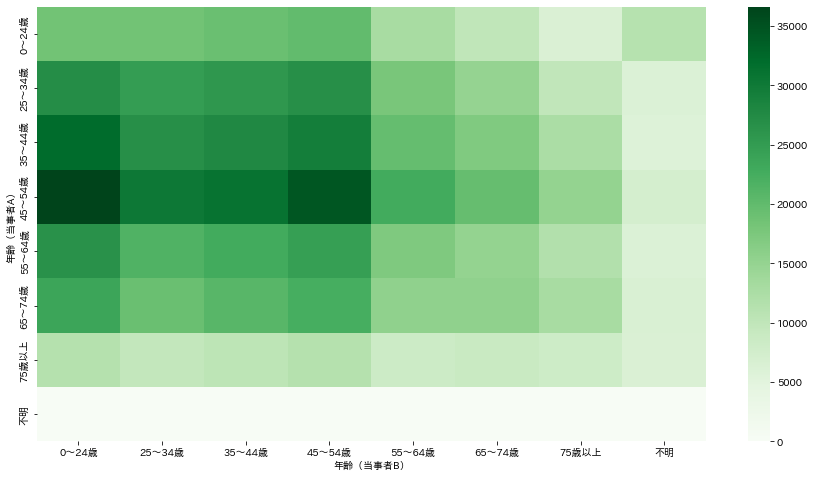

In [24]:
#sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize = (15,8))
sns.heatmap(age_crosstab, cmap="Greens")